# 교통사고유형별발생분석
<hr>
- https://www.data.go.kr/data/15029185/standard.do<br>
- 공공 데이터 교통사고 유형, 검색어: 전국교통사고다발<br>
<hr>
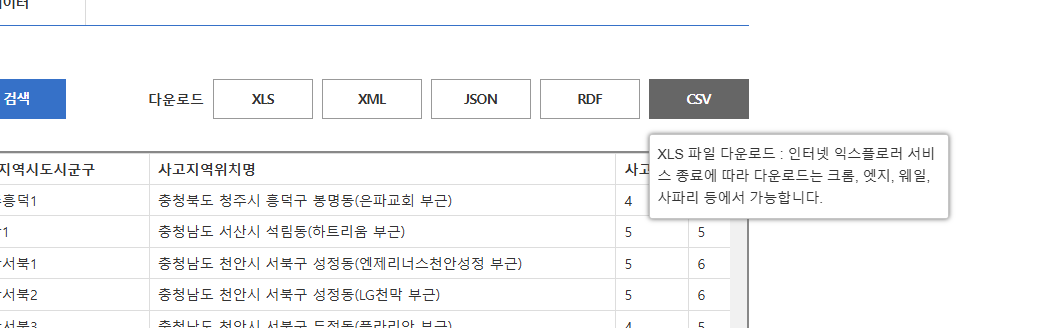

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from datetime import datetime
import pandas as pd
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [3]:
file_path="./ref/전국교통사고다발지역표준데이터.csv"
ori = pd.read_csv(file_path,encoding="euc-kr")
# ori # 위도 경도 = 사고지역 표시, 폴리곤 = 사고지역 영역 표시 로 빼오기 가능

In [4]:
ori_data = ori.groupby('사고유형구분')['사고건수'].sum().reset_index(name='count')
ori_data=ori_data.sort_values('count',ascending=False)
ori_data

,사고유형구분,count
4,자전거,24939
1,보행노인,23165
0,무단횡단,14805
2,보행어린이,3802
3,스쿨존어린이,989


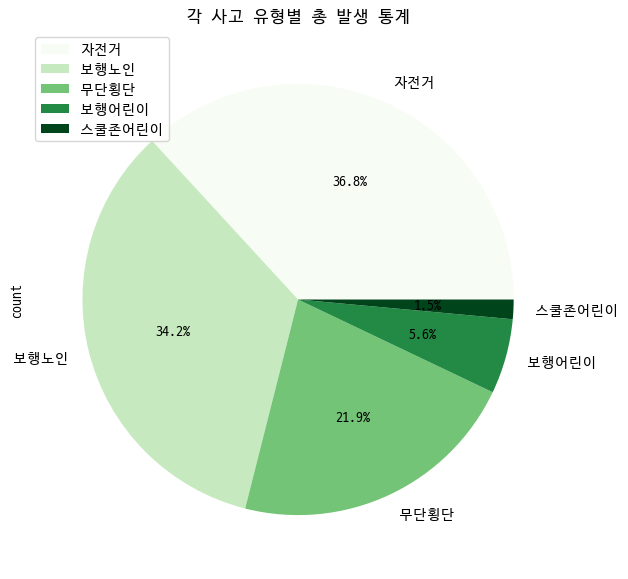

In [5]:
ori_data.plot(
    kind='pie',
    y='count',
    labels=ori_data['사고유형구분'],
    figsize=(7,7),
    startangle=0 ,
    autopct='%2.1f%%' ,
    title="각 사고 유형별 총 발생 통계",
    cmap=matplotlib.cm.Greens
)
# plt.savefig('./chart/accident.png')
plt.show()

In [6]:
ex_data = ori.copy()
ex_data= ex_data.rename(columns={'사고연도':'year','사고유형구분':'type','사고건수':'total'})
ex_data
arr_data = list(set(ex_data['type']))
data_list=[]
for t in arr_data:
    data_list.append(ex_data[ex_data['type']== t])
# print(arr_data,data_list)


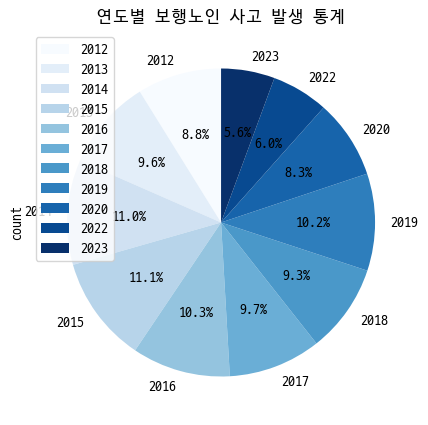

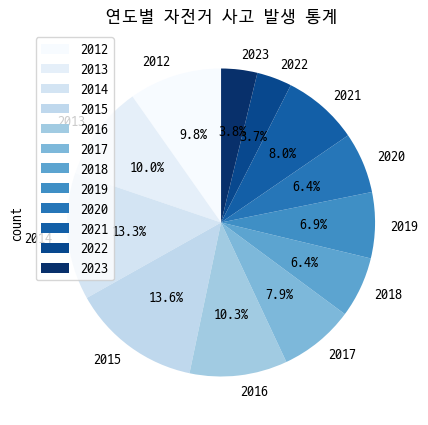

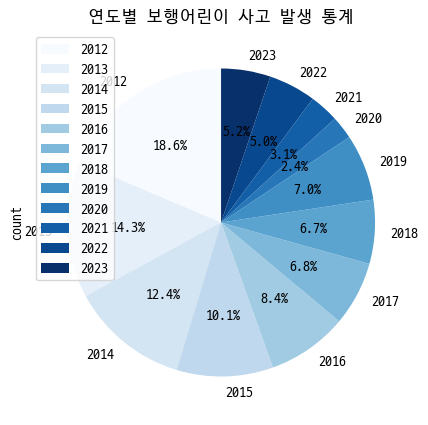

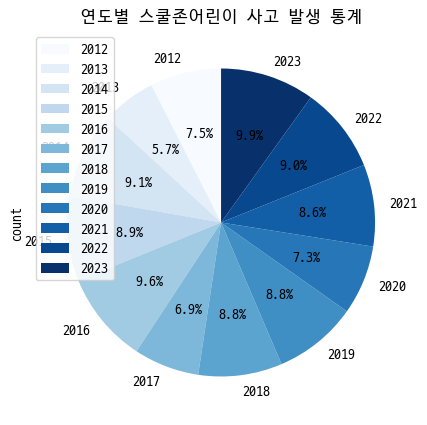

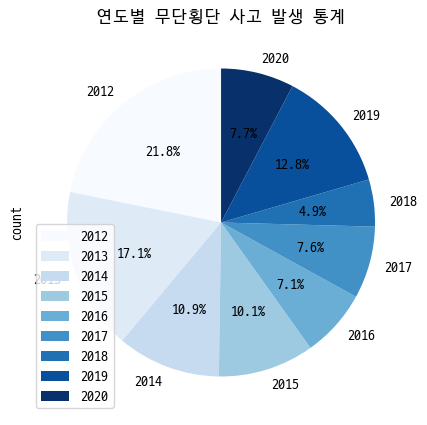

In [7]:
total_list=[]
for d in data_list:
    result = d.groupby('year')["total"].sum().reset_index(name='count')
    total_list.append(result)
total_list
# print(arr_data, total_list)

for i in range(len(arr_data)):
    total_list[i].plot(
        kind = 'pie',
        y ='count',
        labels = total_list[i]['year'],
        figsize=(5,5),
        startangle=90,
        autopct = '%.1f%%',
        title = f'연도별 {arr_data[i]} 사고 발생 통계',
        cmap= matplotlib.cm.Blues
    )
    plt.savefig(f'./chart/chart{i}.png')
    plt.show()

In [8]:
# from IPython.display import display, HTML
# # HTML 생성
# html = f"""
# <div style="display: flex ;flex-wrap:wrap;width:1000px;">
#     <div style="flex: 1; min-width:300px";>
#         <div style="padding: 10px 0 10px 80px;">
#         <h3>Data Table</h3>
#         {ori_data.to_html(index=False)}
#         </div>
#     </div>"""
# for v in range(len(arr_data)):
#     html += f"""<div style="flex: 1; padding: 10px; min-width:300px">
#             <h3>Pie Chart{v+1}</h3>
#             <img src="./chart/chart{v}.png" alt="Pie Chart">
#         </div>"""
# html+=f"""</div> """
#     # HTML 표시
# # print(html)
# display(HTML(html))

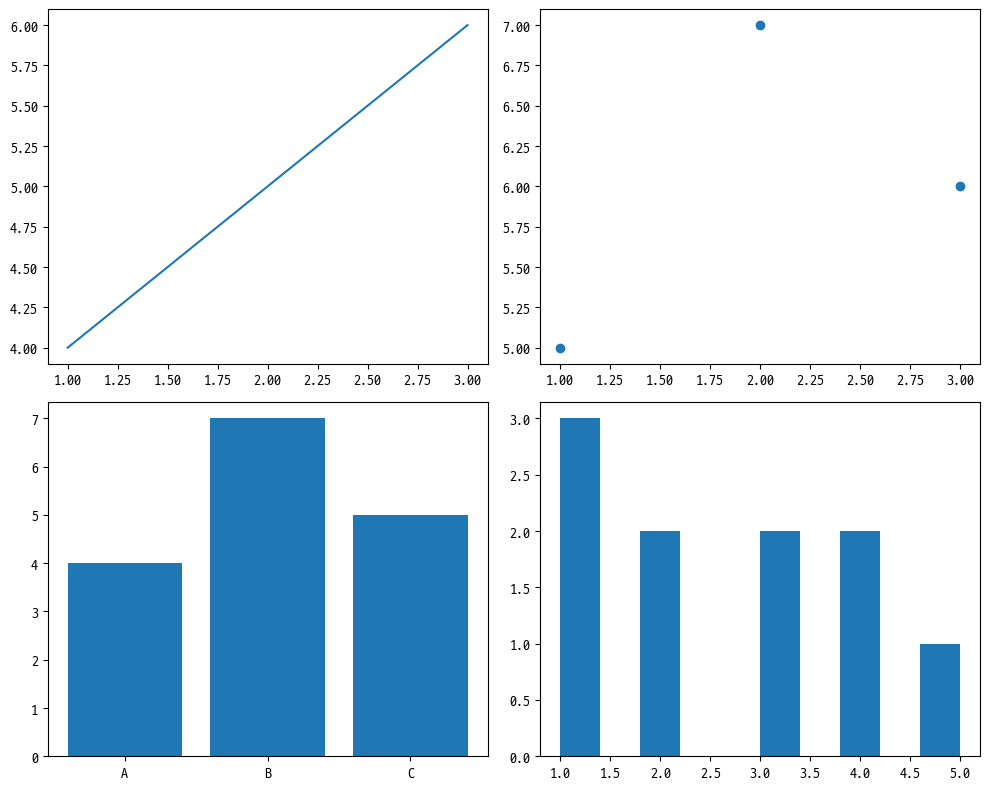

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(10,8)) #2 x 2 서브 플롯 생성

axs[0,0].plot([1,2,3],[4,5,6])
axs[0,1].scatter([1,2,3],[5,7,6])
axs[1,0].bar(['A','B','C'],[4,7,5])
axs[1,1].hist([1,1,2,3,4,5,1,2,3,4,],bins=10)

plt.tight_layout()
plt.show()

# 교통사고 유형별 발생 분석 리포트
- 교통사고 유형은 크게 자전거, 보행노인, 무단횡단 이 3가지가 대부분 차지한다.
- 교통사고 유형별 발생 순위 1위는 자전거 이다.
- 근소한 차이로 보행노인이 2위 이다.
- 보행노인을 제외하고 전체적으로 2012년이 가장 큰 사고 년도를 차지한다.
- 보행노인을 제외한 유형별 사고는 빈도가 점점 줄어들고 있다.

In [10]:
mat =ori.copy()
mat

,사고지역관리번호,사고연도,사고유형구분,위치코드,사고다발지역시도시군구,사고지역위치명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,제공기관코드,제공기관명
0,2021030,2020,무단횡단,15134300,충북 청주흥덕1,충청북도 청주시 흥덕구 봉명동(은파교회 부근),4,4,0,2,2,0,36.650390,127.456188,"{type:Polygon,coordinates:[[[127.45888288,36.6...",2024-09-09,B555234,한국도로교통공단
1,2021030,2020,무단횡단,16044400,충남 서산1,충청남도 서산시 석림동(하트리움 부근),5,5,0,3,2,0,36.777868,126.460281,"{type:Polygon,coordinates:[[[126.46297567,36.7...",2024-09-09,B555234,한국도로교통공단
2,2021030,2020,무단횡단,16054400,충남 천안서북1,충청남도 천안시 서북구 성정동(엔제리너스천안성정 부근),5,6,1,1,4,0,36.826788,127.140857,"{type:Polygon,coordinates:[[[127.14355147,36.8...",2024-09-09,B555234,한국도로교통공단
3,2021030,2020,무단횡단,16054400,충남 천안서북2,충청남도 천안시 서북구 성정동(LG천막 부근),5,6,0,1,5,0,36.810455,127.140805,"{type:Polygon,coordinates:[[[127.14349966,36.8...",2024-09-09,B555234,한국도로교통공단
4,2021030,2020,무단횡단,16054400,충남 천안서북3,충청남도 천안시 서북구 두정동(플라리안 부근),4,5,0,3,2,0,36.833746,127.140057,"{type:Polygon,coordinates:[[[127.14275156,36.8...",2024-09-09,B555234,한국도로교통공단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,2015046,2014,자전거,11710010,서울특별시 송파구10,서울특별시 송파구 거여동(마천사거리 부근),8,8,0,0,4,4,37.497152,127.146265,"{type:Polygon,coordinates:[[[127.1478646,37.49...",2024-09-09,B555234,한국도로교통공단
14474,2015046,2014,자전거,11710011,서울특별시 송파구11,서울특별시 송파구 신천동(잠실역_일반국도3호선_진입_1 부근),7,8,0,4,4,0,37.514094,127.099354,"{type:Polygon,coordinates:[[[127.1009533,37.51...",2024-09-09,B555234,한국도로교통공단
14475,2015046,2014,자전거,11710012,서울특별시 송파구12,서울특별시 송파구 삼전동(신양빌라 부근),7,7,0,4,2,1,37.501233,127.085015,"{type:Polygon,coordinates:[[[127.0866148,37.50...",2024-09-09,B555234,한국도로교통공단
14476,2015046,2014,자전거,11710013,서울특별시 송파구13,서울특별시 송파구 가락동(문정시영아파트 부근),7,7,0,2,2,3,37.492374,127.136029,"{type:Polygon,coordinates:[[[127.1376285,37.49...",2024-09-09,B555234,한국도로교통공단


In [12]:
# !pip install folium
# !pip install ipython

Defaulting to user installation because normal site-packages is not writeable
